## imports

In [1]:
import polars as pl
from polars import col as c
import os, sys, requests
from dotenv import load_dotenv, find_dotenv
from tqdm import tqdm

load_dotenv(find_dotenv())

True

## constants

In [2]:
OMDB_API_KEY = os.getenv("OMDB_API_KEY")
FILES_DIR = "../data"

## load df

In [3]:
file_name = "movies_df.parquet"
file_path = os.path.join(FILES_DIR, file_name)
movies_df = pl.read_parquet(file_path)

In [4]:
# file_name = "movies_df.xlsx"
# file_path = os.path.join(FILES_DIR, file_name)
# movies_df = pl.read_excel(file_path)

## code

In [5]:
movies_df.head()

index,Title,Year,Viewed,title_eng,title_translation,parsed_date,parsed_title,checked,gpt_parsed_titles,years,titles,cleaned_title,cleaned_year,ids,creds,year_,title_,genre_,director_,country_,actors_,box_office_,writer_,language_,imdb_rating_,liked_after_view
i64,str,str,str,str,str,i64,str,str,str,str,str,str,i64,str,struct[25],i64,str,str,str,str,str,i32,str,str,f32,bool
1,"""Действуй сестра""",null,null,"""Not found""","""Act sister""",null,"""Not found""",null,"""Sister Act""","""1992""","""Sister Act""","""Sister Act""",1992,"""tt0105417""","{""Sister Act"",""1992"",""PG"",""29 May 1992"",""100 min"",""Comedy, Family, Music"",""Emile Ardolino"",""Paul Rudnick"",""Whoopi Goldberg, Maggie Smith, Harvey Keitel"",""When a nightclub singer is forced to take refuge from the mob in a convent, she ends up turning the convent choir into a soulful chorus complete with a Motown repertoire, until the sudden celebrity of the choir jeopardizes her ide..."",""English"",""United States"",""9 wins & 10 nominations total"",""https://m.media-amazon.com/images/M/MV5BMjIzOTU0ODItMzcyMi00YzFjLTk3MzktNTQ2YjZmN2E0NTBkXkEyXkFqcGc@._V1_SX300.jpg"",[{""Internet Movie Database"",""6.5/10""}, {""Rotten Tomatoes"",""73%""}, {""Metacritic"",""51/100""}],""51"",""6.5"",""113,562"",""tt0105417"",""movie"",""N/A"",""$139,605,150"",""N/A"",""N/A"",""True""}",1992,"""Sister Act""","""Comedy, Family, Music""","""Emile Ardolino""","""United States""","""Whoopi Goldberg, Maggie Smith,…",139605150,"""Paul Rudnick""","""English""",6.5,false
2,"""Summer lovers""",null,null,"""Summer Lovers_1982_Comedy Dram…","""Summer lovers""",1982,"""Summer Lovers""","""checked""","""Summer lovers""",null,null,"""Summer Lovers""",1982,"""tt0084737""","{""Summer Lovers"",""1982"",""R"",""16 Jul 1982"",""98 min"",""Comedy, Drama, Romance"",""Randal Kleiser"",""Randal Kleiser"",""Peter Gallagher, Daryl Hannah, Valérie Quennessen"",""A young American couple and a French woman engage in a threesome in the Greek Islands."",""English"",""United States"",""N/A"",""https://m.media-amazon.com/images/M/MV5BMTYxNjk0Mjg1NF5BMl5BanBnXkFtZTcwNzAyMTM3NA@@._V1_SX300.jpg"",[{""Internet Movie Database"",""5.8/10""}, {""Rotten Tomatoes"",""25%""}],""N/A"",""5.8"",""4,687"",""tt0084737"",""movie"",""N/A"",""$4,968,000"",""N/A"",""N/A"",""True""}",1982,"""Summer Lovers""","""Comedy, Drama, Romance""","""Randal Kleiser""","""United States""","""Peter Gallagher, Daryl Hannah,…",4968000,"""Randal Kleiser""","""English""",5.8,false
3,"""Джон уик""",null,null,"""John Wick_2014_Action Crime Th…","""John Wick""",2014,"""John Wick""","""checked""","""Джон уик""",null,null,"""John Wick""",2014,"""tt2911666""","{""John Wick"",""2014"",""R"",""24 Oct 2014"",""101 min"",""Action, Crime, Thriller"",""Chad Stahelski"",""Derek Kolstad"",""Keanu Reeves, Michael Nyqvist, Alfie Allen"",""John Wick is a former hitman grieving the loss of his true love. When his home is broken into, robbed, and his dog killed, he is forced to return to action to exact revenge."",""English, Russian, Hungarian"",""United States"",""5 wins & 10 nominations total"",""https://m.media-amazon.com/images/M/MV5BMTU2NjA1ODgzMF5BMl5BanBnXkFtZTgwMTM2MTI4MjE@._V1_SX300.jpg"",[{""Internet Movie Database"",""7.5/10""}, {""Rotten Tomatoes"",""86%""}, {""Metacritic"",""68/100""}],""68"",""7.5"",""783,681"",""tt2911666"",""movie"",""N/A"",""$43,037,835"",""N/A"",""N/A"",""True""}",2014,"""John Wick""","""Action, Crime, Thriller""","""Chad Stahelski""","""United States""","""Keanu Reeves, Michael Nyqvist,…",43037835,"""Derek Kolstad""","""English, Russian, Hungarian""",7.5,false
4,"""Помни""",null,null,"""Remembered_2015_Short Drama_No…","""Remembered""",2015,"""Remembered""","""checked""","""Помни""",null,null,"""Memento""",2000,"""tt0209144""","{""Memento"",""2000"",""R"",""25 May 2001"",""113 min"",""Drama, Mystery, Thriller"",""Christopher Nolan"",""Christopher Nolan, Jonathan Nolan"",""Guy Pearce, Carrie-Anne Moss, Joe Pantoliano"",""A former insura

In [6]:
import matplotlib.pyplot as plt

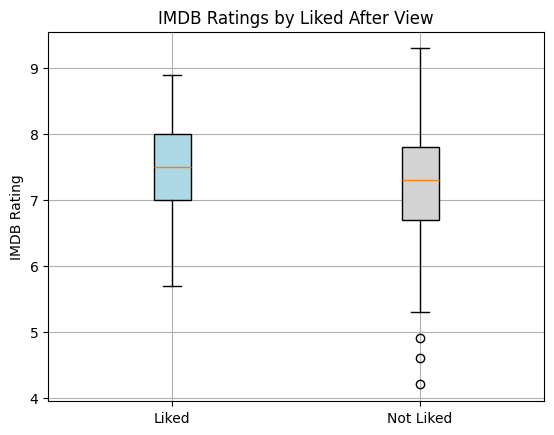

In [7]:
data = []
for val in [True, False]:
    ratings = movies_df.filter(c("liked_after_view") == val)["imdb_rating_"].to_list()
    ratings = [r for r in ratings if r is not None]
    data.append(ratings)

box = plt.boxplot(data, patch_artist=True)
colors = ["lightblue", "lightgrey"]
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

plt.xticks([1, 2], ["Liked", "Not Liked"])
plt.ylabel("IMDB Rating")
plt.title("IMDB Ratings by Liked After View")
plt.grid()
plt.show()

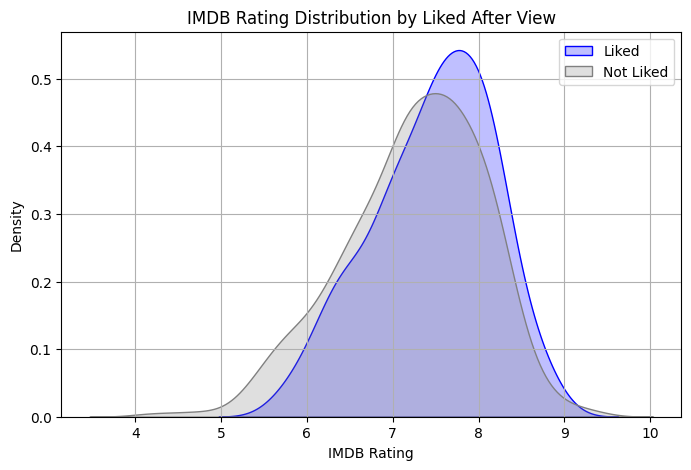

In [8]:
import seaborn as sns

liked_ratings = movies_df.filter(c("liked_after_view") == True)[
    "imdb_rating_"
].to_list()
liked_ratings = [r for r in liked_ratings if r is not None]

not_liked_ratings = movies_df.filter(c("liked_after_view") == False)[
    "imdb_rating_"
].to_list()
not_liked_ratings = [r for r in not_liked_ratings if r is not None]

plt.figure(figsize=(8, 5))
sns.kdeplot(liked_ratings, label="Liked", fill=True, color="blue")
sns.kdeplot(not_liked_ratings, label="Not Liked", fill=True, color="grey")
plt.xlabel("IMDB Rating")
plt.title("IMDB Rating Distribution by Liked After View")
plt.grid()
plt.legend()
plt.show()

In [9]:
movies_df.filter((c("liked_after_view") == False), (c("imdb_rating_") >= 9))["title_"]

title_
str
"""The Shawshank Redemption"""
"""Schindler's List"""
"""The Godfather"""


In [10]:
movies_df.filter(
    (c("liked_after_view") == True),
    (c("imdb_rating_") <= 6),
)["title_"]

title_
str
"""Coyote Ugly"""
"""Cocktail"""
"""Lockout"""
"""Schutzengel"""
"""The Tourist"""
"""Office Christmas Party"""


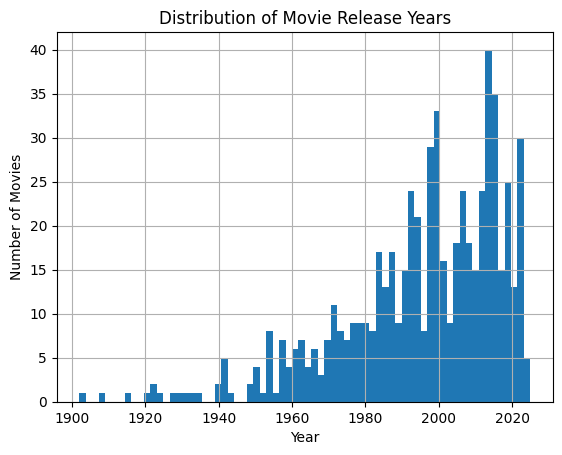

In [11]:
years = [y for y in movies_df["year_"].to_list() if y is not None]
plt.hist(years, bins=70)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Release Years")
plt.grid()
plt.show()

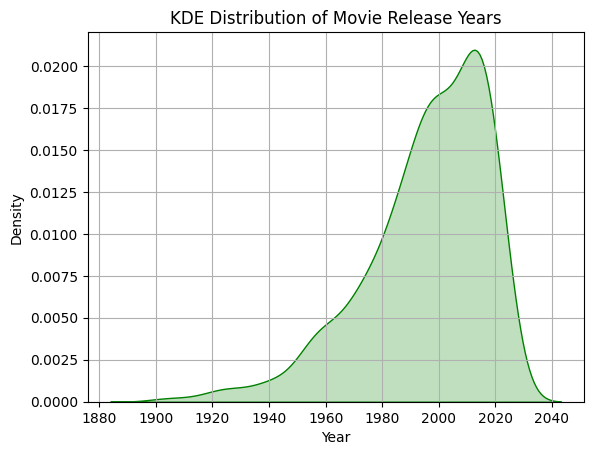

In [12]:
sns.kdeplot(years, fill=True, color="green")
plt.xlabel("Year")
plt.title("KDE Distribution of Movie Release Years")
plt.grid()
plt.show()

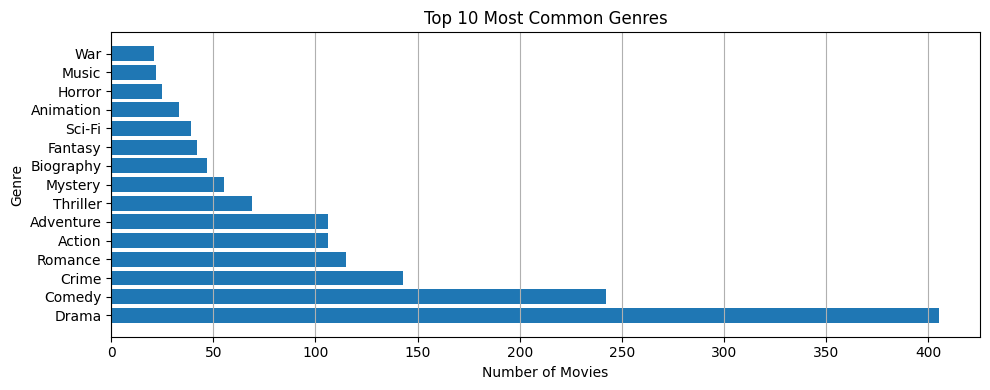

In [13]:
import collections

# Extract genre column, split by comma, and count occurrences
genre_counts = movies_df["genre_"].drop_nulls().to_list()
all_genres = []
for g in genre_counts:
    all_genres.extend([x.strip() for x in g.split(",") if x.strip()])

top_genres = collections.Counter(all_genres).most_common(15)

plt.figure(figsize=(10, 4))
plt.barh([i[0] for i in top_genres], [i[1] for i in top_genres])
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Top 10 Most Common Genres")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

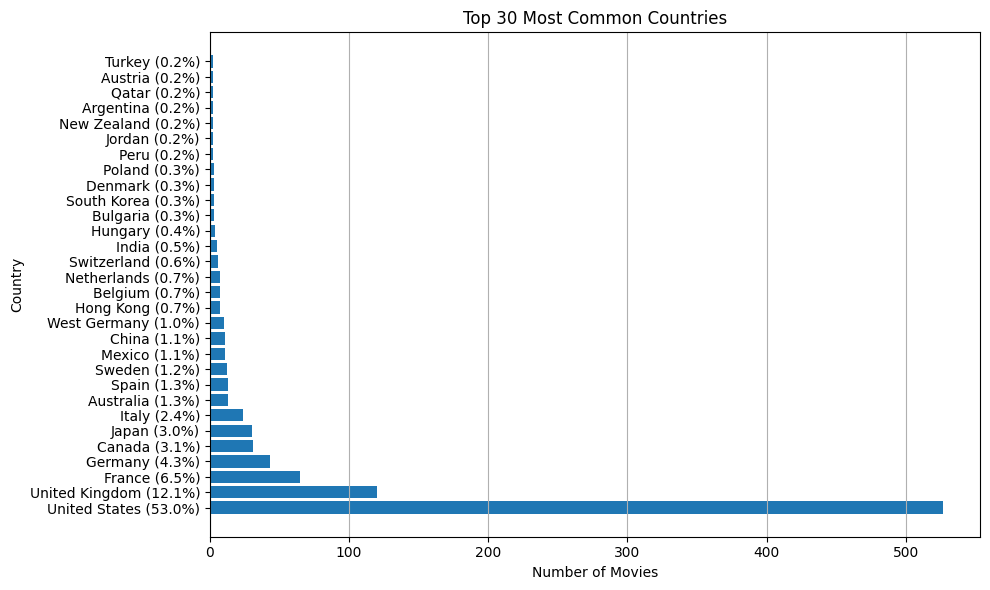

In [17]:
# Extract country column, split by comma, and count occurrences
country_counts = movies_df["country_"].drop_nulls().to_list()
all_countrys = []
for d in country_counts:
    all_countrys.extend([x.strip() for x in d.split(",") if x.strip()])

top_countrys = collections.Counter(all_countrys).most_common(30)

total = len(all_countrys)
labels = [f"{i[0]} ({i[1]/total:.1%})" for i in top_countrys]

plt.figure(figsize=(10, 6))
plt.barh(labels, [i[1] for i in top_countrys])
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.title("Top 30 Most Common Countries")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

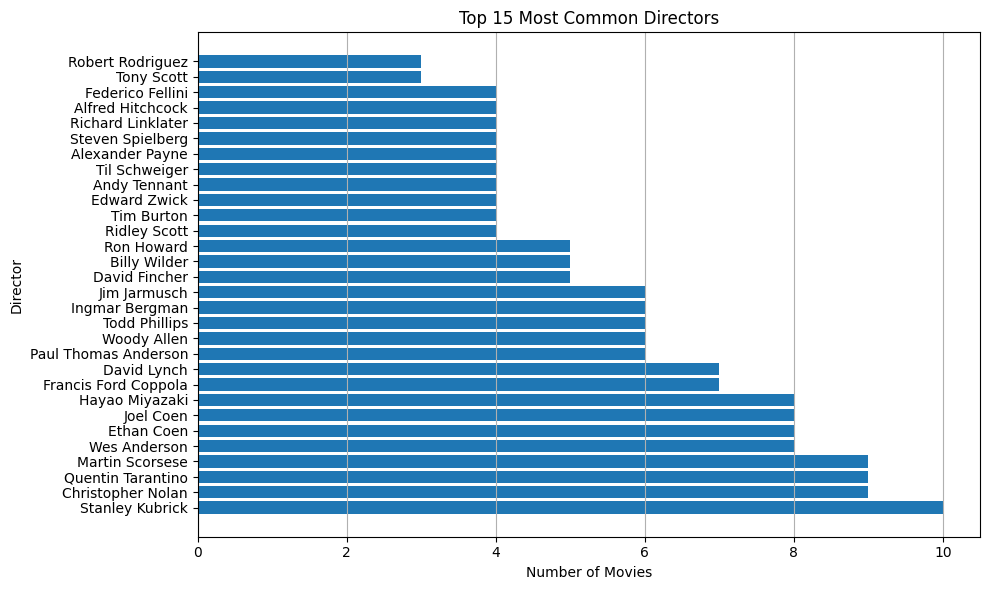

In [14]:
# Extract director column, split by comma, and count occurrences
director_counts = movies_df["director_"].drop_nulls().to_list()
all_directors = []
for d in director_counts:
    all_directors.extend([x.strip() for x in d.split(",") if x.strip()])

top_directors = collections.Counter(all_directors).most_common(30)

plt.figure(figsize=(10, 6))
plt.barh([i[0] for i in top_directors], [i[1] for i in top_directors])
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.title("Top 15 Most Common Directors")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

In [18]:
for director, count in top_directors:
    movies = movies_df.filter(c("director_").str.contains(director))["title_"].to_list()
    print(f"{director} ({count} movies):")
    for i, title in enumerate(movies):
        print(f"\t{i+1}\t{title}")
    print()

Stanley Kubrick (10 movies):
	1	The Shining
	2	Eyes Wide Shut
	3	Spartacus
	4	2001: A Space Odyssey
	5	Barry Lyndon
	6	A Clockwork Orange
	7	Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
	8	Paths of Glory
	9	Full Metal Jacket
	10	Lolita

Christopher Nolan (9 movies):
	1	Memento
	2	Interstellar
	3	Inception
	4	The Prestige
	5	Insomnia
	6	Following
	7	Dunkirk
	8	Tenet
	9	Oppenheimer

Quentin Tarantino (9 movies):
	1	The Hateful Eight
	2	Pulp Fiction
	3	Django Unchained
	4	Reservoir Dogs
	5	Inglourious Basterds
	6	Jackie Brown
	7	Grindhouse
	8	Once Upon a Time... in Hollywood
	9	Kill Bill: Vol. 1

Martin Scorsese (9 movies):
	1	The Color of Money
	2	The Departed
	3	Hugo
	4	Taxi Driver
	5	The Wolf of Wall Street
	6	Raging Bull
	7	Goodfellas
	8	The Aviator
	9	The King of Comedy

Wes Anderson (8 movies):
	1	Rushmore
	2	The Royal Tenenbaums
	3	The Grand Budapest Hotel
	4	The Life Aquatic with Steve Zissou
	5	Moonrise Kingdom
	6	The French Dispatch
	7	The Wonderful Story

## end